The following sequence of code will prepare our data for analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

## Collect and prepare data for analysis

In [3]:
df = pd.read_csv('ORCL.csv',  parse_dates=True)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df = df[[ 'Close']]

In [6]:
df

,Close
0,45.709999
1,46.070000
2,45.939999
3,46.580002
4,46.930000
...,...
1245,95.589996
1246,96.470001
1247,95.809998
1248,94.830002


In [7]:
df['Close'].isna().sum()

0

In [8]:
row_count = df.shape[0] # store the number of obersvations (daily temperature readings)
row_count

1250

In [9]:
closes = df.to_numpy() # to make things easier, we create a numpy array from our dataframe of temperatures
closes.shape

(1250, 1)

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

closes = scaler.fit_transform(closes)

In [11]:
sequence_length = 10  # here, I create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [12]:
closes = closes[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
closes.shape

(1250, 1)

In [13]:
closes = closes.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
closes

array([[-1.28516015, -1.26173941, -1.27019694, ..., -1.21359684,
        -1.2188015 , -1.23116235],
       [-1.24547505, -1.187574  , -1.24222224, ..., -1.19798319,
        -1.21945201, -1.17846603],
       [-1.18041762, -1.19277847, -1.15244293, ..., -1.11861306,
        -1.27279904, -1.24807741],
       ...,
       [ 1.21044291,  1.2663923 ,  1.24232092, ...,  1.43879462,
         1.459613  ,  1.45180591],
       [ 1.46676931,  1.60534144,  1.58647472, ...,  1.85646319,
         1.91436423,  1.98137332],
       [ 1.84084953,  1.85451153,  1.84995757, ...,  1.974217  ,
         1.91046098,  1.93127936]])

In [14]:
# we can now see that our days have been organized into rows of sequence length. 

In [15]:
# Next, standardize


In [16]:
# create our X and y. 
# X will be the 59 days prior...
X = closes[:, :-1] # all rows, all columns except the last one
# y will be the 60th day (what we are trying to predict)
y = closes[:, -1] # all rows, only the last column

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(87, 9, 1)
(38, 9, 1)


# Simple RNN

Use RNN, LTSM, Gru, and Conv1D techniques to predict the 10th-day closing price. Discuss the performance of each of the models and which one seems to perform the best.

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [20]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(15, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, target_train, epochs=45)

Epoch 1/45
3/3 [==============================] - 1s 5ms/step - loss: 2.1484
Epoch 2/45
3/3 [==============================] - 0s 3ms/step - loss: 1.9928
Epoch 3/45
3/3 [==============================] - 0s 4ms/step - loss: 1.8381
Epoch 4/45
3/3 [==============================] - 0s 6ms/step - loss: 1.6864
Epoch 5/45
3/3 [==============================] - 0s 5ms/step - loss: 1.5439
Epoch 6/45
3/3 [==============================] - 0s 4ms/step - loss: 1.4206
Epoch 7/45
3/3 [==============================] - 0s 5ms/step - loss: 1.3152
Epoch 8/45
3/3 [==============================] - 0s 3ms/step - loss: 1.2051
Epoch 9/45
3/3 [==============================] - 0s 2ms/step - loss: 1.1028
Epoch 10/45
3/3 [==============================] - 0s 1ms/step - loss: 1.0050
Epoch 11/45
3/3 [==============================] - 0s 4ms/step - loss: 0.9188
Epoch 12/45
3/3 [==============================] - 0s 4ms/step - loss: 0.8307
Epoch 13/45
3/3 [==============================] - 0s 4ms/step - loss: 0.

### Predictions

In [22]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [23]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [24]:
mean_squared_error(comparison['actual'], comparison['predicted'])

4.984464229808613

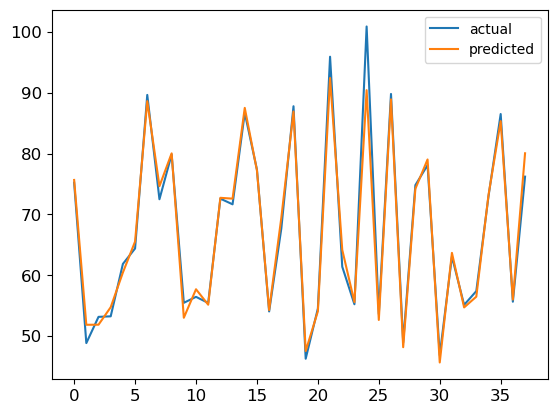

In [25]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with More Layers

In [29]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, target_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 0.9794
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7031
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.5136
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.3630
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.2496
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1751
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.1335
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0875
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0427
Epoch 10/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 12/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0210
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.

## Predicitons

In [32]:
#Predict:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [34]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [35]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.062927566596715

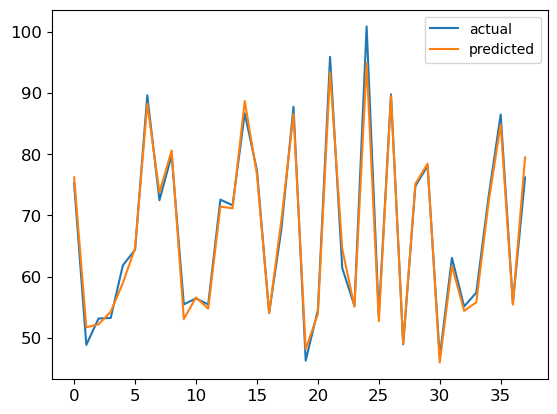

In [36]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with one layer

In [37]:
model = keras.models.Sequential([
    keras.layers.LSTM(10, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, target_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 0.7914
Epoch 2/30
3/3 [==============================] - 0s 7ms/step - loss: 0.7552
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.7148
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6731
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6317
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.5890
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.5506
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.5085
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.4676
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.4265
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.3879
Epoch 12/30
3/3 [==============================] - 0s 4ms/step - loss: 0.3486
Epoch 13/30
3/3 [==============================] - 0s 4ms/step - loss: 0.

### Predictions

In [39]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [40]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [41]:
mean_squared_error(comparison['actual'], comparison['predicted'])

21.05572635606016

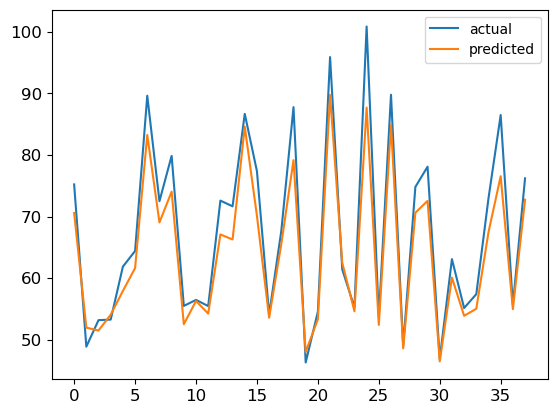

In [42]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [43]:
model = keras.models.Sequential([
    keras.layers.LSTM(10, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(10, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, target_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 3s 10ms/step - loss: 0.8953
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 0.8312
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7672
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7052
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.6451
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 0.5858
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.5336
Epoch 8/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4782
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 0.4254
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.3732
Epoch 11/30
3/3 [==============================] - 0s 11ms/step - loss: 0.3259
Epoch 12/30
3/3 [==============================] - 0s 10ms/step - loss: 0.2764
Epoch 13/30
3/3 [==============================] - 0s 12ms/step - los

#### Predictions

In [45]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 3ms/step


In [46]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [47]:
mean_squared_error(comparison['actual'], comparison['predicted'])

15.999955499347086

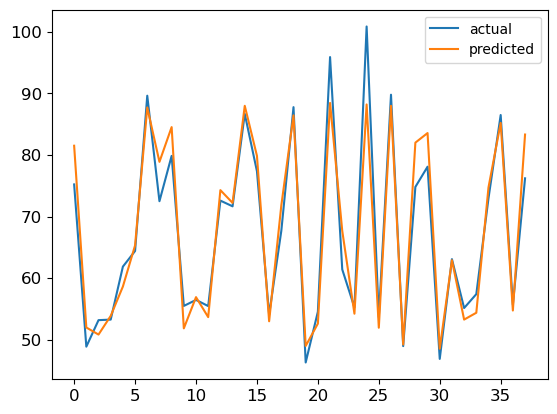

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [49]:
model = keras.models.Sequential([
    keras.layers.GRU(10, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(10, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(X_train, target_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 0.8050
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 0.7084
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.6374
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.5754
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 0.5220
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4736
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.4305
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.3897
Epoch 9/30
3/3 [==============================] - 0s 8ms/step - loss: 0.3510
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.3099
Epoch 11/30
3/3 [==============================] - 0s 8ms/step - loss: 0.2686
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 0.2323
Epoch 13/30
3/3 [==============================] - 0s 8ms/step - loss: 0.

#### Predictions

In [51]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
mean_squared_error(comparison['actual'], comparison['predicted'])

5.915249560268924

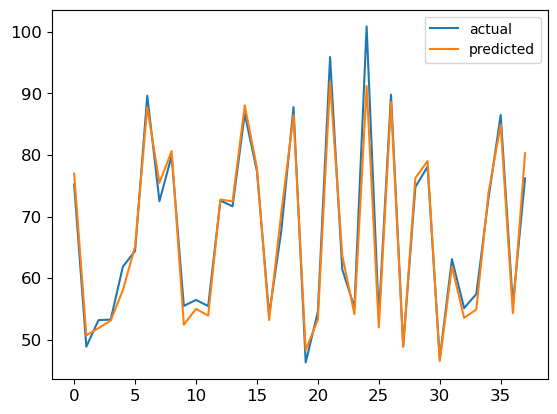

In [54]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [55]:

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(10, activation='relu', return_sequences=True),
    keras.layers.GRU(10, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, target_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 3s 7ms/step - loss: 1.7298
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 1.5506
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 1.3957
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 1.2852
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 1.1931
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 1.1144
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0517
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 0.9957
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.9492
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.9040
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8626
Epoch 12/30
3/3 [==============================] - 0s 7ms/step - loss: 0.8214
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.

#### Predictions

In [57]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [58]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([target_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [59]:
mean_squared_error(comparison['actual'], comparison['predicted'])

131.10305483181298

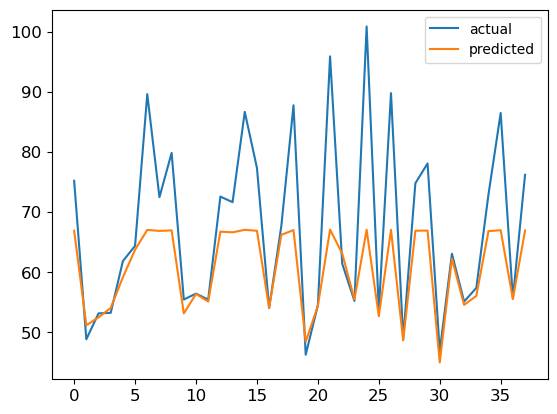

In [60]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

#### Simple RNN -  4.984464229808613 - loss: 0.0071
#### Simple RNN more layers - 3.062927566596715 - loss: 0.0082
#### LTSM one Layer - 21.05572635606016 - loss: 0.0848
#### LTSM More Layers - 15.999955499347086 - loss: 0.0316
#### GRU More Layers - 5.915249560268924 - loss: 0.0117
#### Conv1D - 131.10305483181298 - loss: 0.5333

### Analysis:

Based on the given data, the best model appears to be the Simple RNN with more layers as it has the lowest Mean Squared Error of 3.062927567 and a low loss of 0.0082. The next best model is the GRU with more layers with a relatively low Mean Squared Error of 5.91524956 and a loss of 0.0117. The remaining models, including the Conv1D and all LSTM models, have relatively higher Mean Squared Errors and losses, indicating poorer performance.